In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.__version__ # change kernel if < 1.23

'1.20.3'

In [3]:
np.random.seed(40)
data = np.random.randint(0,10,size=(10,5))

__Turn on slides__

In [4]:
data

array([[6, 7, 5, 8, 8],
       [2, 1, 7, 2, 3],
       [7, 3, 9, 0, 1],
       [5, 9, 8, 4, 4],
       [8, 6, 3, 3, 7],
       [7, 1, 3, 5, 2],
       [2, 3, 7, 9, 3],
       [2, 2, 5, 0, 1],
       [7, 9, 3, 8, 5],
       [9, 3, 2, 6, 9]])

__Recall__: Manipulate Arrays with the index

1. Use square brackets `[ ]`
2. Convention is __Row__ then __Column__
3. Python uses a __zero-based__ index

<img src="../imgs/arrays-01.png" width=200, align='left'>

What will `data[4,:]` return?

In [5]:
data[4,:]

array([8, 6, 3, 3, 7])

How would you get this data?


<img src="../imgs/array_slice.png" width=300, align='left'>

In [6]:
#INSERT CODE HERE

Numpy has a ton of really powerful functions:

- `np.mean()`
- `np.median()`
- `np.std()`
- `np.max()`
- `np.min()`

__And Linear algebra__
- `np.dot()`
- `np.tensordot()`
- `np.linalg.eig()`
- `np.linalg.lstsq( )`

`np.max()` and `np.argmax()`

In [8]:
print(f"Max: {np.max(data)}")
print(f"Max is at the {np.argmax(data)} position")

Max: 9
Max is at the 12 position


In [9]:
data.flatten()

array([6, 7, 5, 8, 8, 2, 1, 7, 2, 3, 7, 3, 9, 0, 1, 5, 9, 8, 4, 4, 8, 6,
       3, 3, 7, 7, 1, 3, 5, 2, 2, 3, 7, 9, 3, 2, 2, 5, 0, 1, 7, 9, 3, 8,
       5, 9, 3, 2, 6, 9])

__Now suppose we want the mean of the first three columns of data__

In [10]:
# Insert Code here

__Transpose: Reverse the axes of an array__

<img src="../imgs/transpose.png" width=300, align='left'>

with a lot of numpy functions you can eith use the function: `np.transpose()` or the method of a data array `data.T`

In [77]:
print(f"Shape before transpose: {data.shape}")
print(f"Shape after transpose: {data.T.shape}")

Shape before transpose: (10, 5)
Shape after transpose: (5, 10)


Vertical Stacking: `np.vstack()`

Given multiple sequences (ie,list, np.array), stack them on top of each other

In [83]:
x1 = [1,2,3,4]
x2 = [0,0,0,0]
stacked = np.vstack((x1,x2))
print(stacked)
print(stacked.shape)

[[1 2 3 4]
 [0 0 0 0]]
(2, 4)


Can also stack horizontally (`np.hstack`), depthwise(`np.dstack`)

## Advanced stuff ##
__Convolutions: box-car, aka running average filters__

Here we can download some data from the sensors measuring the temperature of seawater at Moss Landing

In [115]:
url = "http://pubdata.mlml.calstate.edu/mlml_last/seawater/2022-11.csv"
df = pd.read_csv(url)

df['dateTime'] = pd.to_datetime(df['pst_time']) # this makes a column that python knows is a datetime and can handle

time = df['dateTime']
temp = df['temp'].values

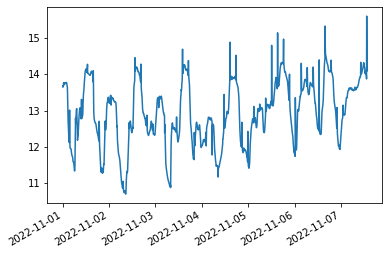

In [116]:
fig, ax = plt.subplots()
ax.plot(time, temp)
fig.autofmt_xdate()

In [117]:
boxcar = np.ones(12*1) / (12*1) # 1 hour box car (15 measurments per hour * 1 hours)
filter_temp = np.convolve(temp, boxcar, mode='same')

Convolve moves an a smaller array across a larger array and in this case, acts as a low-pass filter.

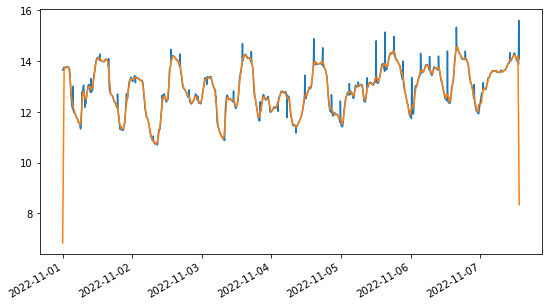

In [119]:
fig, ax = plt.subplots()
fig.set_size_inches(9,5)
ax.plot(time, temp)
ax.plot(time, filter_temp)

fig.autofmt_xdate()